<div>
    
# <p style="text-align:center;">FIT5196 Assessment 2</p>
## Task 2 Data Reshaping 
#### Group_Number: 142
#### Student Name: Pankaj Shitole
#### Student ID: 33570523
#### Student Name: Sachin Shivaramaiah
#### Student ID: 34194037


##### Date: 18/10/2024
</div>

# 1. Introduction 

This task focused on preparing the suburb_info.xlsx dataset for a linear regression model to predict median_house_price in Melbourne suburbs. The goal was to reshape the data using normalization and transformation techniques to improve its suitability for linear modeling.

We explored features like number_of_houses, number_of_units, population, aus_born_perc, and median_income and applied transformations such as log, square root, box-cox, and power based on their skewness. We also used multiple sacling techniques to bring all features to the same scale.

**We also stick to the assumptions of the Linear Regression Analysis**<br>
The primary objectives were:

- Standardizing feature scales.
- Enhancing linearity between features and median_house_price.

<br>The exploration identified the best transformations and scaling methods to ensure the data aligns with linear regression assumptions, preparing it for the next modeling stage.

# 2. Load the required libraries and dataset

In [1]:
# Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.metrics import r2_score
from itertools import product
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

In [2]:
# Load the dataset
file_path = 'suburb_info.xlsx'  
df = pd.read_excel(file_path)

In [3]:
# Display the first 5 rows of the dataset
df.head()

,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,ABBOTSFORD,2304,4706,Yarra,68%,"$1,797","$1,299,400",4025
1,ABERFELDIE,1410,453,Moonee Valley,81%,"$1,571","$1,926,600",22442
2,ALBANVALE,1897,138,Brimbank,46%,$907,"$594,200",54005
3,ALBION,1389,1392,Brimbank,52%,$929,"$739,100",30677
4,ALPHINGTON,1729,1099,Darebin,73%,"$1,538","$1,729,600",9227


# 3. Understanding the dataset

## 3.1 Observations on the Data set

##### Print the summary statistics to check the datatypes

In [4]:
# Check the overall structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   suburb              202 non-null    object
 1   number_of_houses    202 non-null    int64 
 2   number_of_units     202 non-null    int64 
 3   municipality        202 non-null    object
 4   aus_born_perc       202 non-null    object
 5   median_income       202 non-null    object
 6   median_house_price  202 non-null    object
 7   population          202 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.8+ KB


**Based on the data info we can see that:**
- Due to some symbols the Dtype of aus_born_perc, median_income and median_house_price is object.
- We need to remove those symbols to clean the data and convert the mentioned columns into their relevant Dtypes.

In [5]:
# Print the total number of rows
len(df)

202

In [6]:
# Check for missing values
df.isnull().sum()

suburb                0
number_of_houses      0
number_of_units       0
municipality          0
aus_born_perc         0
median_income         0
median_house_price    0
population            0
dtype: int64

So here we do not have any missing values in the dataset.

In [7]:
# Print the statistical summary of the dataset
df.describe()

,number_of_houses,number_of_units,population
count,202.000000,202.000000,202.000000
mean,4155.767327,2480.410891,18659.311881
std,3400.864988,3132.684712,9604.187282
min,283.000000,60.000000,170.000000
25%,1973.500000,620.500000,12063.000000
50%,3256.500000,1603.000000,17583.000000
75%,5518.500000,3089.000000,24045.000000
max,23338.000000,24380.000000,54005.000000


**Based on the summary statistics, we can get some key points:**

- First, the features like number_of_houses, number_of_units, and population have values that are on very different scales. For example, for the number_of_houses ranges from 283 to 23,338, while number_of_units has values between 60 and 24,380. But we want all features to be on the same scale for a linear regression model, applying scaling techniques will be important in this case.

- Secondly, the data shows a wide distribution, with significant standard deviations across the features. For example, number_of_houses has a standard deviation of 3,400, which is quite high relative to the mean of 4,155.

- Lastly, there might be a case of skewness in the data. The difference between the mean and the median for most features is not close to each other, which suggest possible left or right skewness of the data. In such cases, transformations like log or Box-Cox might be needed to normalize the distributions and improve the linear relationship with the target variable.

## 3.2 Data Cleaning

As per the above justification, cleaning the columns aus_born_perc, median_income and median_house_price which are in object Dtype. 
- For aus_born_perc: We need to remove the % symbol and convert it into float datatype
- For median_income: We need to remove '\$' and ',' symbol and convert it into float datatype
- For median_house_price: We need to remove the '\$' and ',' symbol and typecast the column into float datatype

In [8]:
df['aus_born_perc'] = df['aus_born_perc'].str.rstrip('%').astype(float)  # Convert percentages to float
df['median_income'] = df['median_income'].replace(r'[\$,]', '', regex=True).astype(float)  # Remove $ and convert to float
df['median_house_price'] = df['median_house_price'].replace(r'[\$,]', '', regex=True).astype(float)  # Remove $ and commas

In [9]:
# Display the changes
df.head()

,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,ABBOTSFORD,2304,4706,Yarra,68.0,1797.0,1299400.0,4025
1,ABERFELDIE,1410,453,Moonee Valley,81.0,1571.0,1926600.0,22442
2,ALBANVALE,1897,138,Brimbank,46.0,907.0,594200.0,54005
3,ALBION,1389,1392,Brimbank,52.0,929.0,739100.0,30677
4,ALPHINGTON,1729,1099,Darebin,73.0,1538.0,1729600.0,9227


In [10]:
# Check the Dtypes using info() to validate the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   suburb              202 non-null    object 
 1   number_of_houses    202 non-null    int64  
 2   number_of_units     202 non-null    int64  
 3   municipality        202 non-null    object 
 4   aus_born_perc       202 non-null    float64
 5   median_income       202 non-null    float64
 6   median_house_price  202 non-null    float64
 7   population          202 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 12.8+ KB


Now the datatypes looks good.

In [11]:
# Create a copy of the dataframe
suburb_df = df

# 4. Understanding Data Distributions

## 4.1 Implementing Pair Plots 

* Why pair plots? 
- Using pair plots in the initial stages of our task is a powerful way to visually assess the relationships between features, detect issues like skewness or outliers, and ensure that the dataset is suitable for linear regression. They offer a quick, visual understanding of the dataset and can guide us in making decisions about transformations, feature engineering, and addressing multicollinearity.

**To plot multiple pairwise bivariate distributions in a dataset, you can use the .pairplot() function.** <br>
Ref: https://www.geeksforgeeks.org/python-seaborn-pairplot-method/

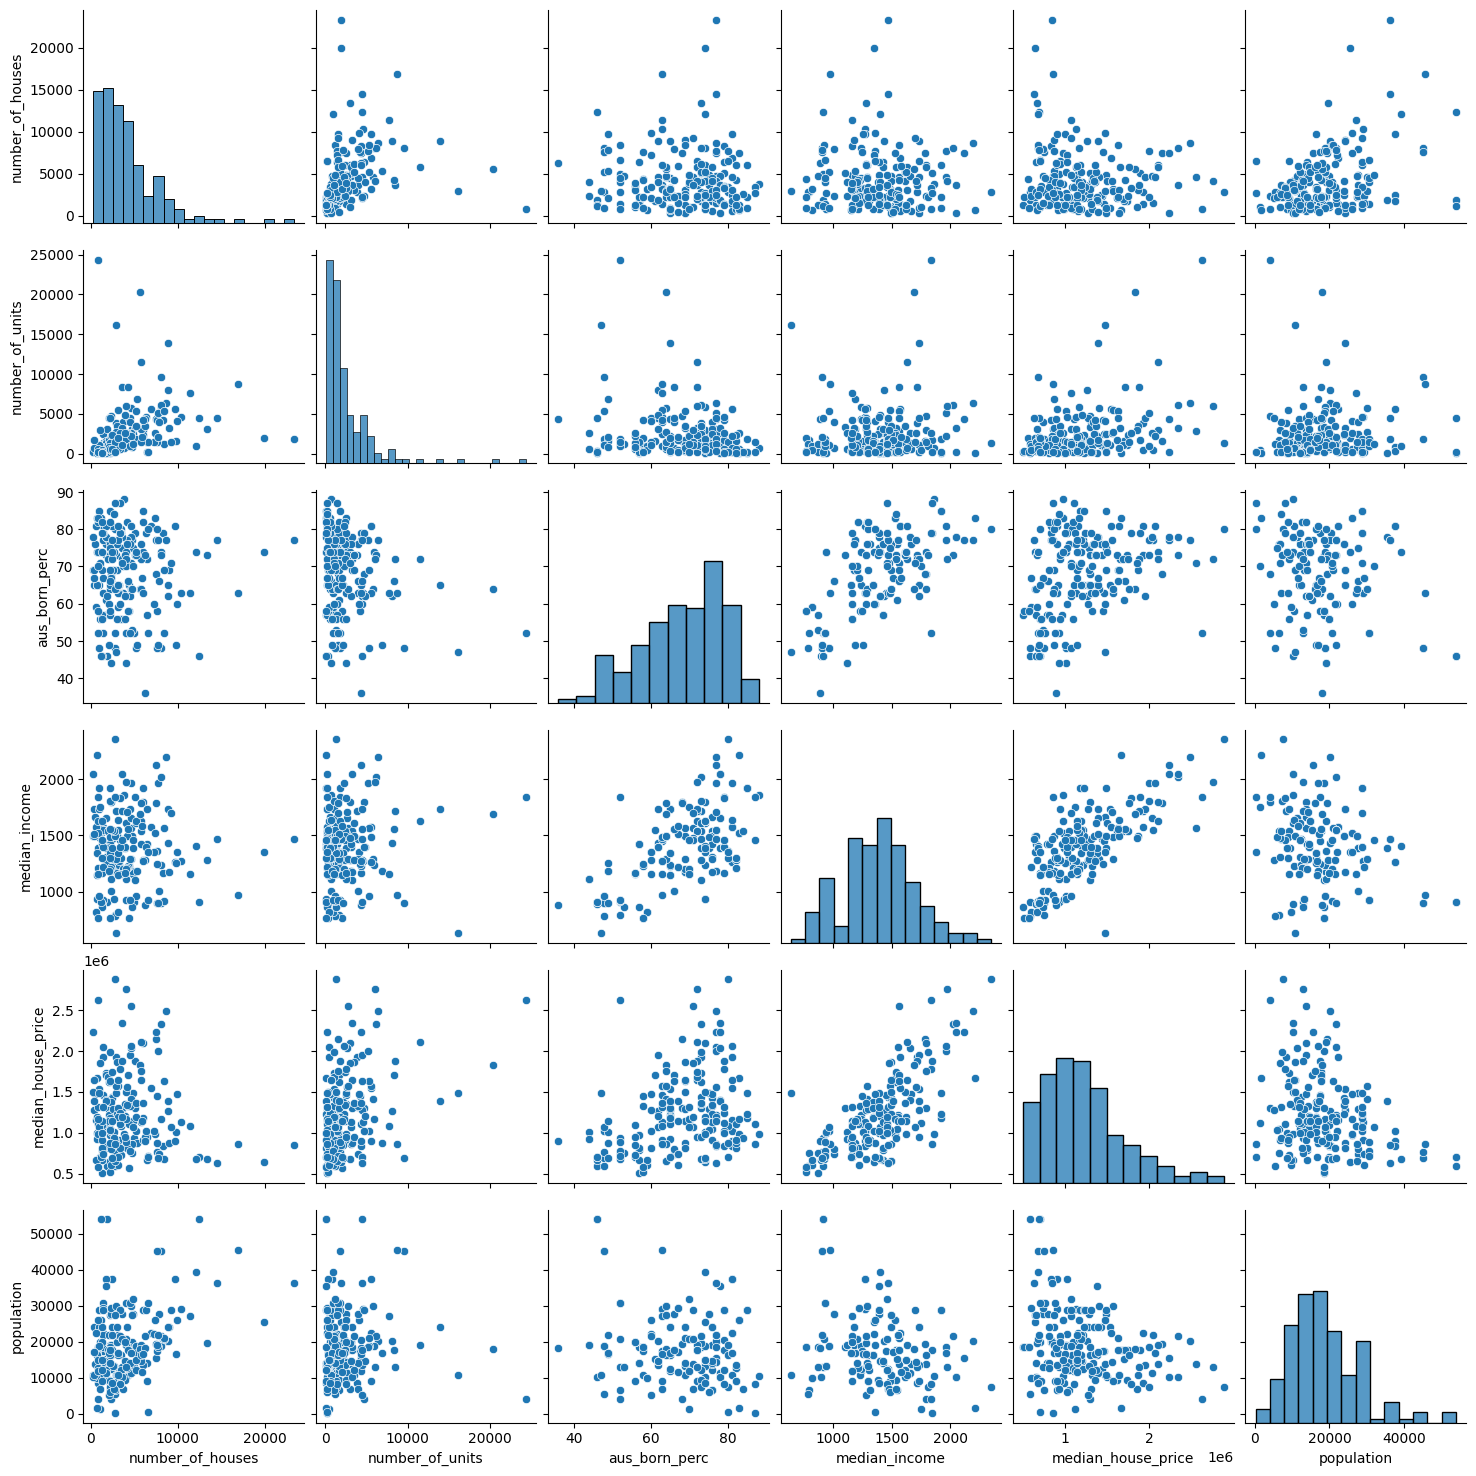

In [12]:
sns.pairplot(suburb_df)

* Plot Interpretations:
* Skewness: Variables like Number of Houses, Number of Units, and Population show right-skewed distributions, indicating the need for transformation.
* Positive Correlation: Median Income has a strong positive correlation with Median House Price, making it a significant predictor.
* Weak Relationships: Aus Born Percentage shows weak or non-linear relationships with other variables.

## 4.2 Check for Multicollinearity

* Why check for Multicollinearity?
* Finding multicollinearity after pair plots is essential to detect if any independent variables are highly correlated, which can affect the stability and accuracy of regression models. Addressing multicollinearity helps improve model performance by ensuring that the independent variables are not redundant or overlapping in their information.

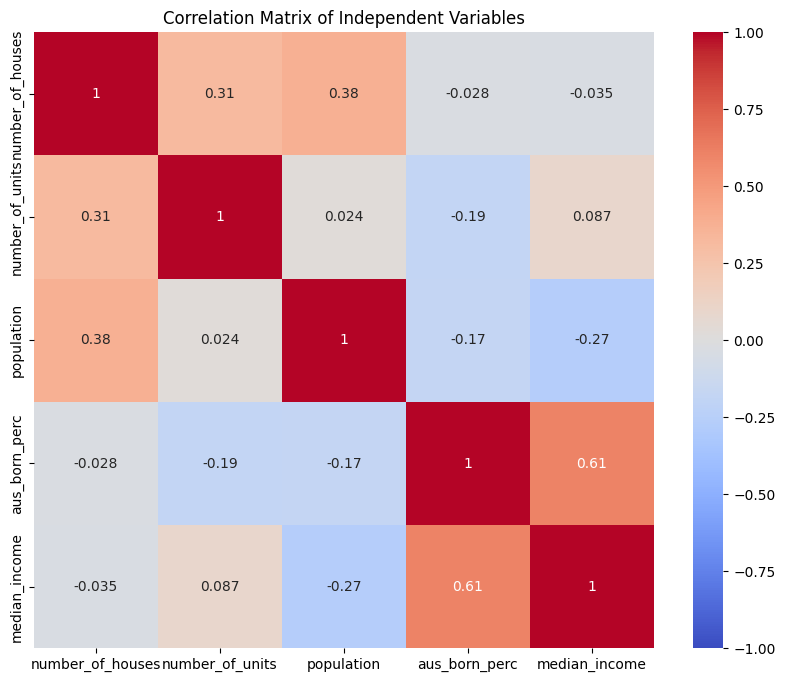

In [13]:
# Calculate the correlation matrix for the independent variables
correlation_matrix = suburb_df[['number_of_houses', 'number_of_units', 'population', 
                                'aus_born_perc', 'median_income']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

## 4.3 Understanding Linear regression model performance before transformation.

* Basic Linear Regression Model without any transformation and MinMax scaling (For same scale)
* Performing a basic linear regression without transformations helps establish a baseline understanding of the model’s performance with raw data. This step helps us identify the need for future transformations and provides a starting point to measure improvements in model accuracy after addressing issues like multicollinearity and feature distribution.

In [14]:
# Define the feature columns and the target column
features = ['number_of_houses', 'number_of_units', 'aus_born_perc', 'median_income', 'population']
target = 'median_house_price'

In [15]:
# Split the data into training and test sets (80% train, 20% test)
X = suburb_df[features]
y = suburb_df[target]

In [16]:
# Split the dataset into train and test dataset, with the test_size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize the linear regression model
model_basic = LinearRegression()
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

Using .fit() method just on train data so there will not be any issue of data leakage.

In [18]:
# Scale the features using MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Train the model on the training data
model_basic.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
# Make predictions on the training and test data
y_train_pred = model_basic.predict(X_train_scaled)
y_test_pred = model_basic.predict(X_test_scaled)

In [21]:
# Calculate R² score for both training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [22]:
# Print the R² value
print(f"R² value on training data: {r2_train:.4f}")
print(f"R² value on test data: {r2_test:.4f}")

R² value on training data: 0.6781
R² value on test data: 0.0045


**Here the R2 value for test data is very low, which again shows the importance of transformation and scaling.**

# 5. Data Transformations
- So here our main aim is to get the linear relationship between the independent variable and the dependent variable or target variable.

## 5.1 Transformation on aus_born_perc

### Methodology: Trial and Error.

In [23]:
# Dictionary to store correlations for different transformations
correlations = {}

#### 5.1.1 log(1+x) transformation

Logarithmic Transformation (log(1+x)):
- Log transformation is often used to handle skewed data by compressing the range and bringing extreme values closer together.
- In this case, after applying log_aus_born_perc, we can see that there isn’t a strong linear relationship between log_aus_born_perc and median_house_price. This suggests that log transformation doesn't significantly improve the correlation in this case.

In [24]:
suburb_df['log_aus_born_perc'] = np.log1p(suburb_df['aus_born_perc'])

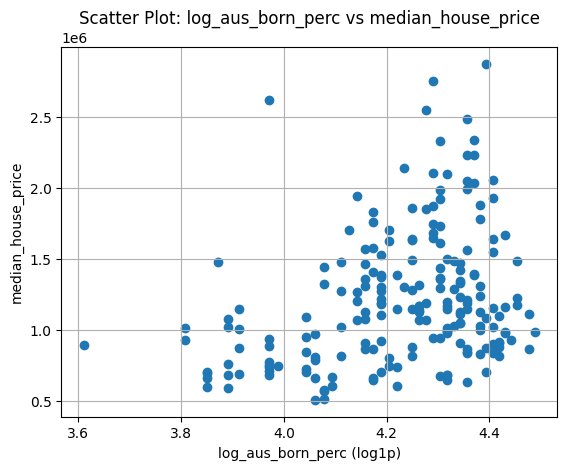

In [25]:
# Plot the scatter plot of log_aus_born_perc vs median_house_price
plt.scatter(suburb_df['log_aus_born_perc'], suburb_df['median_house_price'])
plt.title('Scatter Plot: log_aus_born_perc vs median_house_price')
plt.xlabel('log_aus_born_perc (log1p)')
plt.ylabel('median_house_price')
plt.grid(True)
plt.show()

#### 5.1.2 Cube Root Transformation:

* This transformation is used to reduce the effect of large values while keeping small values intact. It also helps with reducing skewness.
* From the scatter plot, it appears that the cube root transformation has a slight improvement in the linear relationship compared to the log transformation, but it's still not significant.

In [26]:
suburb_df['cbrt_transformed'] = np.cbrt(suburb_df['aus_born_perc'])

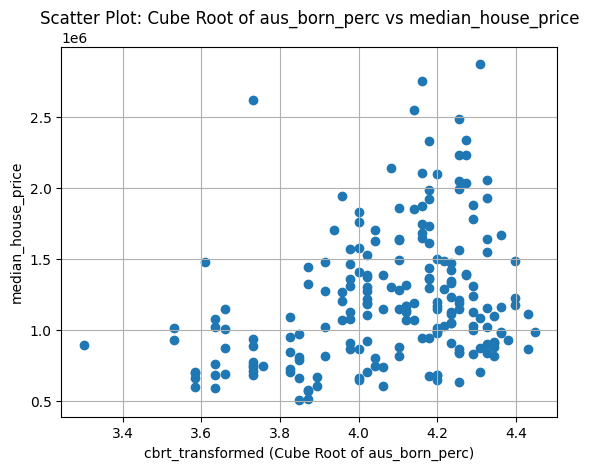

In [27]:
# Plot the scatter plot of cbrt_transformed vs median_house_price
plt.scatter(suburb_df['cbrt_transformed'], suburb_df['median_house_price'])
plt.title('Scatter Plot: Cube Root of aus_born_perc vs median_house_price')
plt.xlabel('cbrt_transformed (Cube Root of aus_born_perc)')
plt.ylabel('median_house_price')
plt.grid(True)
plt.show()

#### 5.1.3 Cube Transformation (x^3):

* Cubing a variable exaggerates larger values, making it useful for data with minimal skewness.
* However, cubing the aus_born_perc does not create a strong linear relationship with the target. The scatter plot remains dispersed, and the transformation doesn’t improve the relationship.

In [28]:
suburb_df['cubed_transformed'] = suburb_df['aus_born_perc'] ** 3

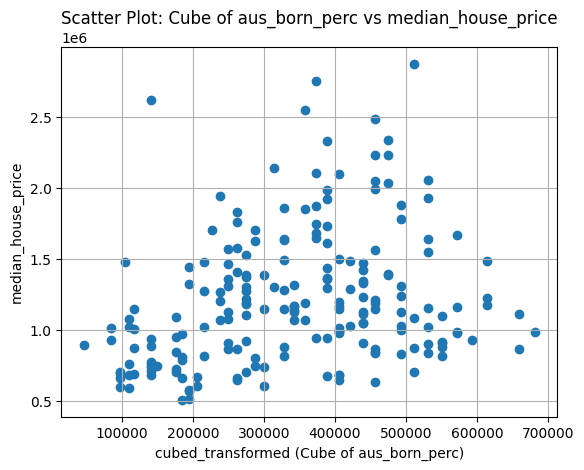

In [29]:
# Plot the scatter plot of cubed_transformed vs median_house_price
plt.scatter(suburb_df['cubed_transformed'], suburb_df['median_house_price'])
plt.title('Scatter Plot: Cube of aus_born_perc vs median_house_price')
plt.xlabel('cubed_transformed (Cube of aus_born_perc)')
plt.ylabel('median_house_price')
plt.grid(True)
plt.show()

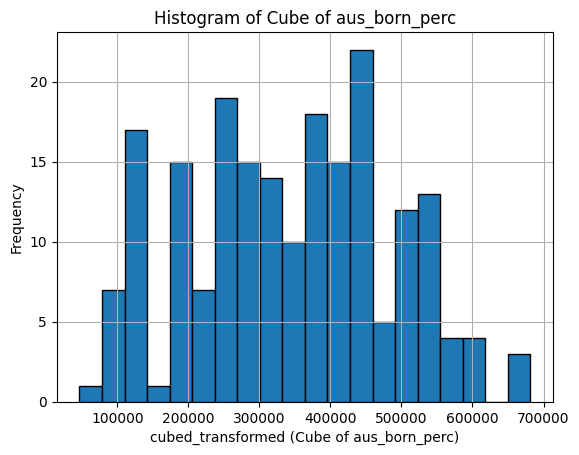

In [30]:
# Plot the histogram of the cube-transformed aus_born_perc
plt.hist(suburb_df['cubed_transformed'], bins=20, edgecolor='black')
plt.title('Histogram of Cube of aus_born_perc')
plt.xlabel('cubed_transformed (Cube of aus_born_perc)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

No this is not working. Since there is no strong linear relationship between aus_born_perc with target variable.

#### 5.1.4 Square Root Transformation:

* Similar to the cube root, this transformation is used to moderate the effect of larger values. It’s commonly applied to reduce right-skewed distributions.
* The scatter plot here shows a small clustering but still no strong linear relationship with median_house_price.

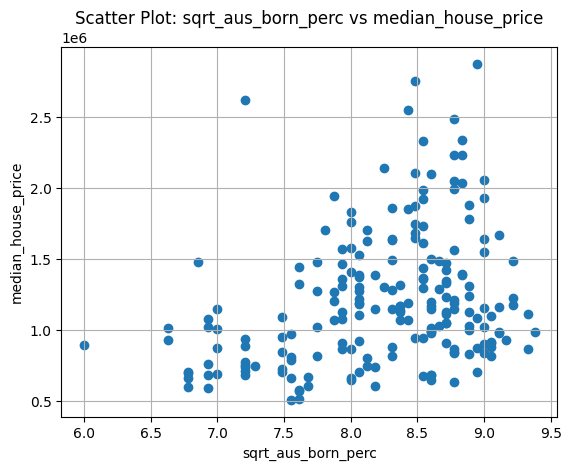

In [31]:
# Apply square root transformation
suburb_df['sqrt_aus_born_perc'] = np.sqrt(suburb_df['aus_born_perc'])

# Plot the scatter plot of sqrt_aus_born_perc vs median_house_price
plt.scatter(suburb_df['sqrt_aus_born_perc'], suburb_df['median_house_price'])
plt.title('Scatter Plot: sqrt_aus_born_perc vs median_house_price')
plt.xlabel('sqrt_aus_born_perc')
plt.ylabel('median_house_price')
plt.grid(True)
plt.show()

#### 5.1.5 Inverse transformation

* This transformation helps to deal with variables where small values are important, and large values are not.
* In this case, the scatter plot shows no strong correlation between inv_aus_born_perc and median_house_price.

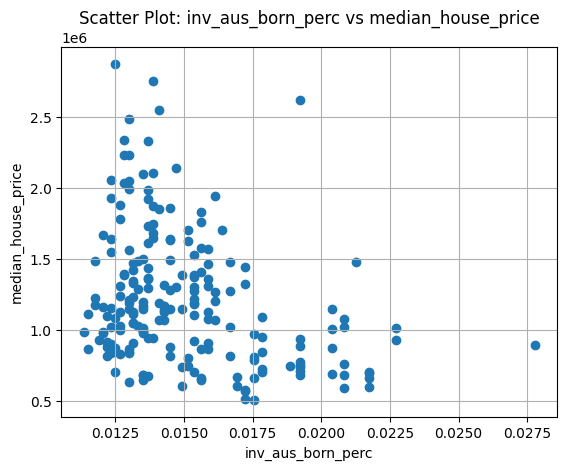

In [32]:
# Apply inverse transformation
suburb_df['inv_aus_born_perc'] = 1 / suburb_df['aus_born_perc']

# Plot the scatter plot of inv_aus_born_perc vs median_house_price
plt.scatter(suburb_df['inv_aus_born_perc'], suburb_df['median_house_price'])
plt.title('Scatter Plot: inv_aus_born_perc vs median_house_price')
plt.xlabel('inv_aus_born_perc')
plt.ylabel('median_house_price')
plt.grid(True)
plt.show()

#### 5.1.6 Box-cox transformation

* This is a power transformation that aims to stabilize variance and make the data more normal. It can be highly effective for continuous data.
* Although Box-Cox is a powerful transformation, the scatter plot still shows a weak relationship with median_house_price, suggesting that it doesn’t improve correlation much in this specific case.

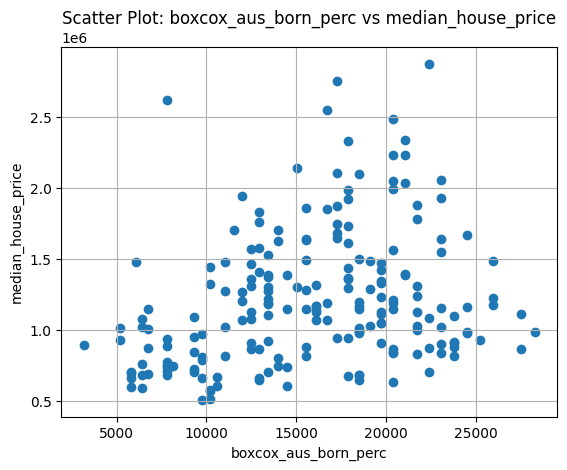

In [33]:
from scipy.stats import boxcox

# Apply Box-Cox transformation (add 1 to avoid zeros)
suburb_df['boxcox_aus_born_perc'], _ = boxcox(suburb_df['aus_born_perc'] + 1)

# Plot the scatter plot of boxcox_aus_born_perc vs median_house_price
plt.scatter(suburb_df['boxcox_aus_born_perc'], suburb_df['median_house_price'])
plt.title('Scatter Plot: boxcox_aus_born_perc vs median_house_price')
plt.xlabel('boxcox_aus_born_perc')
plt.ylabel('median_house_price')
plt.grid(True)
plt.show()

#### 5.1.7 Squared Transformation

* Squaring the variable helps to emphasize differences in higher values.
* The squared transformation also does not produce a strong linear relationship, as seen in the scatter plot. There’s no clear pattern that indicates correlation with median_house_price.


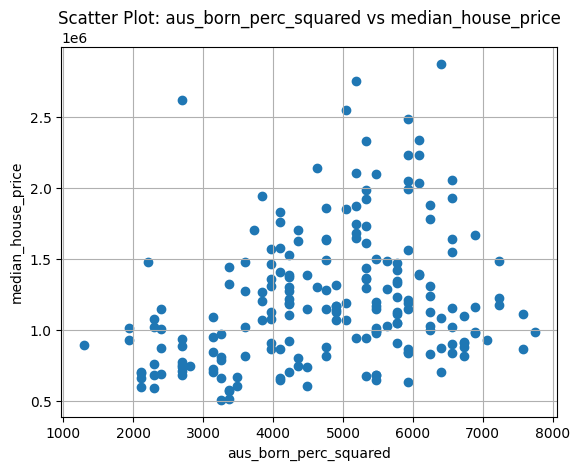

In [34]:
# Apply polynomial transformation (squared)
suburb_df['aus_born_perc_squared'] = suburb_df['aus_born_perc'] ** 2

# Plot the scatter plot of aus_born_perc_squared vs median_house_price
plt.scatter(suburb_df['aus_born_perc_squared'], suburb_df['median_house_price'])
plt.title('Scatter Plot: aus_born_perc_squared vs median_house_price')
plt.xlabel('aus_born_perc_squared')
plt.ylabel('median_house_price')
plt.grid(True)
plt.show()

* None of the transformations significantly enhance the linear relationship between aus_born_perc and median_house_price.

#### 5.1.8 Logit Transformation

* The logit transformation is applied to handle percentage values and stretch values at both extremes (close to 0 or 1) and hence will go with logit transformation for aus_born_perc
* **Also in the given material it was recommended to use Logit for percentage type of data**

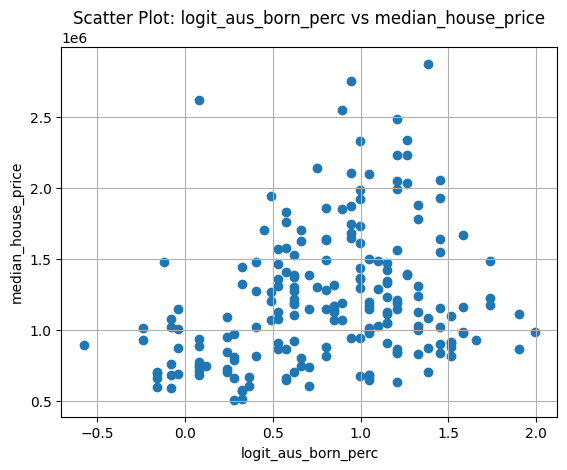

In [35]:
# Convert aus_born_perc to proportion
suburb_df['aus_born_perc_proportion'] = suburb_df['aus_born_perc'] / 100

# Apply logit transformation (add small constant to avoid division by zero for extreme values)
suburb_df['logit_aus_born_perc'] = np.log(suburb_df['aus_born_perc_proportion'] / (1 - suburb_df['aus_born_perc_proportion']))

# Handle cases where p is exactly 0 or 1
suburb_df['logit_aus_born_perc'] = np.where(suburb_df['aus_born_perc_proportion'].isin([0, 1]), np.nan, suburb_df['logit_aus_born_perc'])

# Plot the scatter plot of logit_aus_born_perc vs median_house_price
plt.scatter(suburb_df['logit_aus_born_perc'], suburb_df['median_house_price'])
plt.title('Scatter Plot: logit_aus_born_perc vs median_house_price')
plt.xlabel('logit_aus_born_perc')
plt.ylabel('median_house_price')
plt.grid(True)
plt.show()

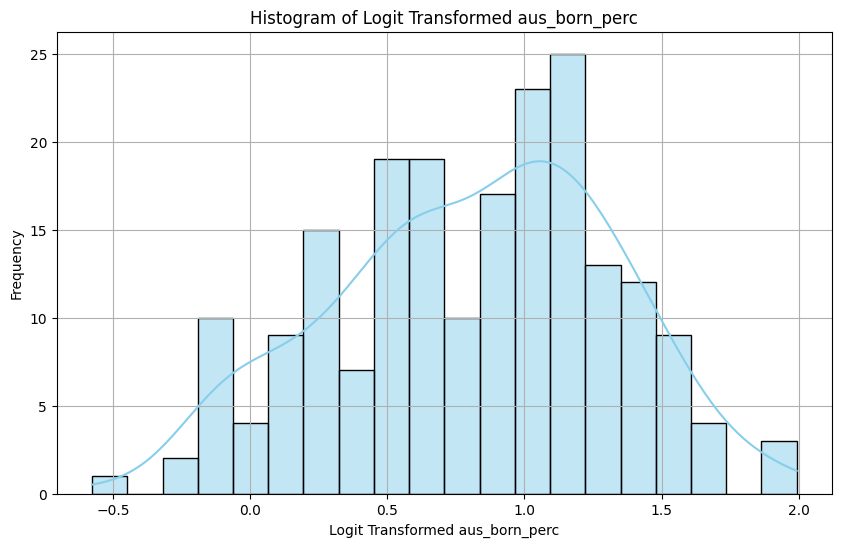

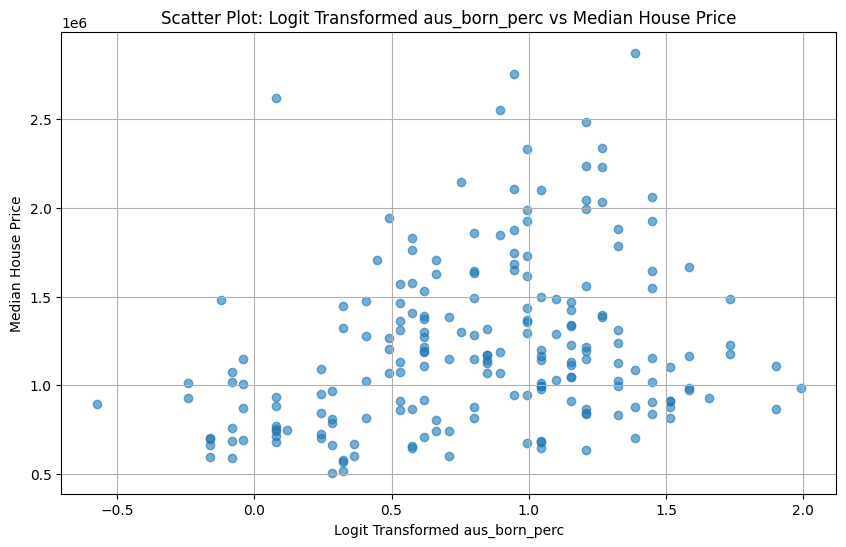

Pearson correlation for logit_aus_born_perc: 0.2800


In [36]:
# Convert 'aus_born_perc' to proportion by dividing by 100
suburb_df['aus_born_perc_prop'] = suburb_df['aus_born_perc'] / 100

# Apply logit transformation
suburb_df['logit_aus_born_perc'] = np.log(suburb_df['aus_born_perc_prop'] / (1 - suburb_df['aus_born_perc_prop']))

# Plot the histogram of the transformed 'aus_born_perc'
plt.figure(figsize=(10, 6))
sns.histplot(suburb_df['logit_aus_born_perc'], kde=True, bins=20, color='skyblue')
plt.title('Histogram of Logit Transformed aus_born_perc')
plt.xlabel('Logit Transformed aus_born_perc')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the scatter plot of logit transformed 'aus_born_perc' vs 'median_house_price'
plt.figure(figsize=(10, 6))
plt.scatter(suburb_df['logit_aus_born_perc'], suburb_df['median_house_price'], alpha=0.6)
plt.title('Scatter Plot: Logit Transformed aus_born_perc vs Median House Price')
plt.xlabel('Logit Transformed aus_born_perc')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()

# Calculate and print the Pearson correlation
logit_correlation = suburb_df['logit_aus_born_perc'].corr(suburb_df['median_house_price'])
print(f'Pearson correlation for logit_aus_born_perc: {logit_correlation:.4f}')

## 5.2 Transformation on number_of_houses

### 5.2.1 Initial Histogram:

- A weak negative correlation (-0.1045) between number_of_houses and median_house_price was observed, indicating a lack of strong linear relationship.
- Histogram:
The distribution of number_of_houses is heavily right-skewed, showing that most suburbs have a low number of houses with a few having very high numbers.

Initial Correlation with median_house_price: -0.1045


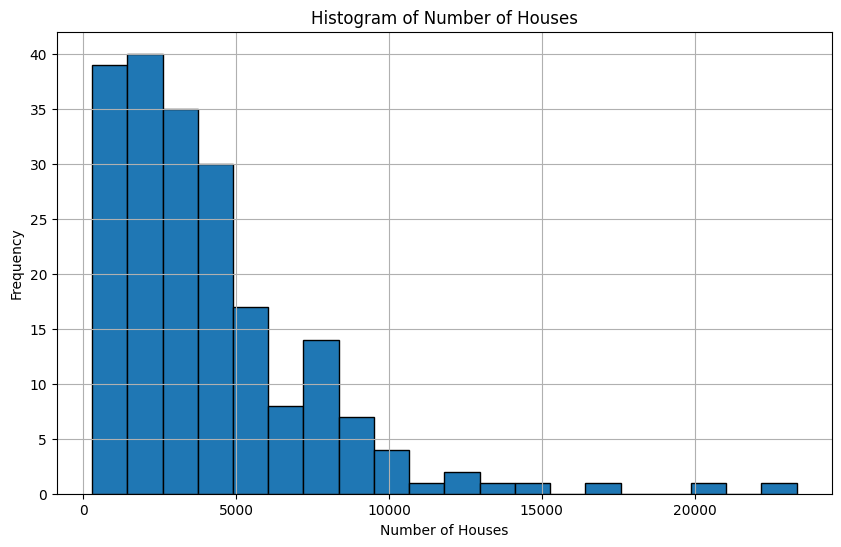

In [37]:
# Step 1: Initial Correlation with median_house_price
initial_corr = suburb_df['number_of_houses'].corr(suburb_df['median_house_price'])
print(f"Initial Correlation with median_house_price: {initial_corr:.4f}")

# Step 2: Histogram of 'number_of_houses'
plt.figure(figsize=(10, 6))
plt.hist(suburb_df['number_of_houses'], bins=20, edgecolor='black')
plt.title('Histogram of Number of Houses')
plt.xlabel('Number of Houses')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 5.2.2 Observing Skewness 

* Scatter Plot:
The scatter plot of number_of_houses vs median_house_price shows no clear pattern, confirming the weak correlation, with points widely scattered and no obvious trend.

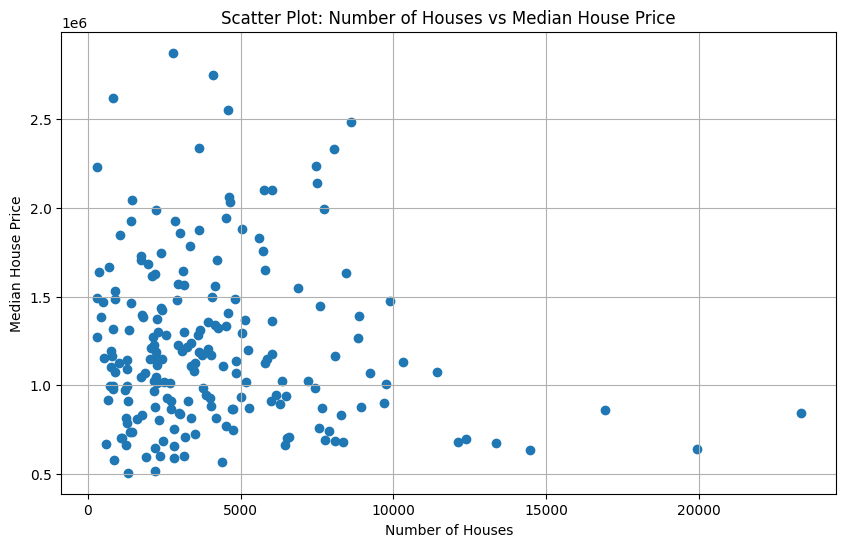

In [38]:
# Step 3: Scatter Plot of 'number_of_houses' vs 'median_house_price'
plt.figure(figsize=(10, 6))
plt.scatter(suburb_df['number_of_houses'], suburb_df['median_house_price'])
plt.title('Scatter Plot: Number of Houses vs Median House Price')
plt.xlabel('Number of Houses')
plt.ylabel('Median House Price')
plt.grid(True)
plt.show()

### 5.2.3 Applying Transformation.

- Since number_of_houses is right skewed trying some best transformations which work well with the right skewed distributions.

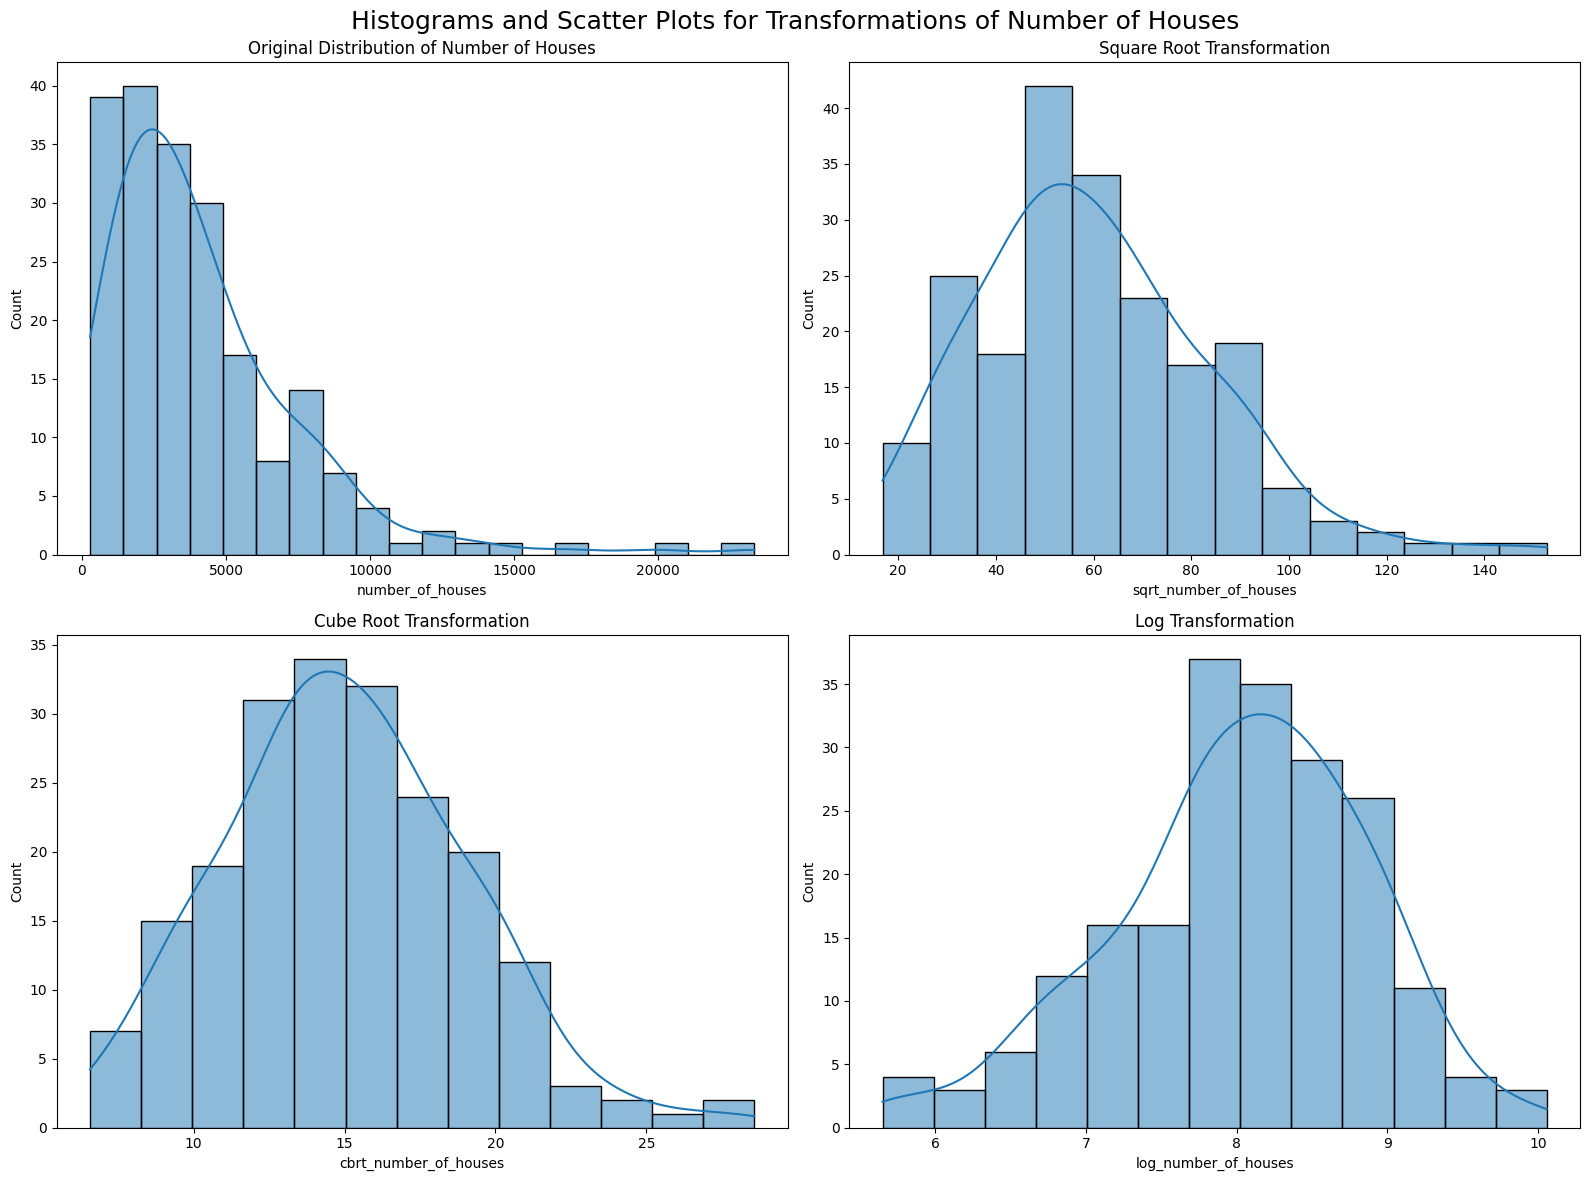

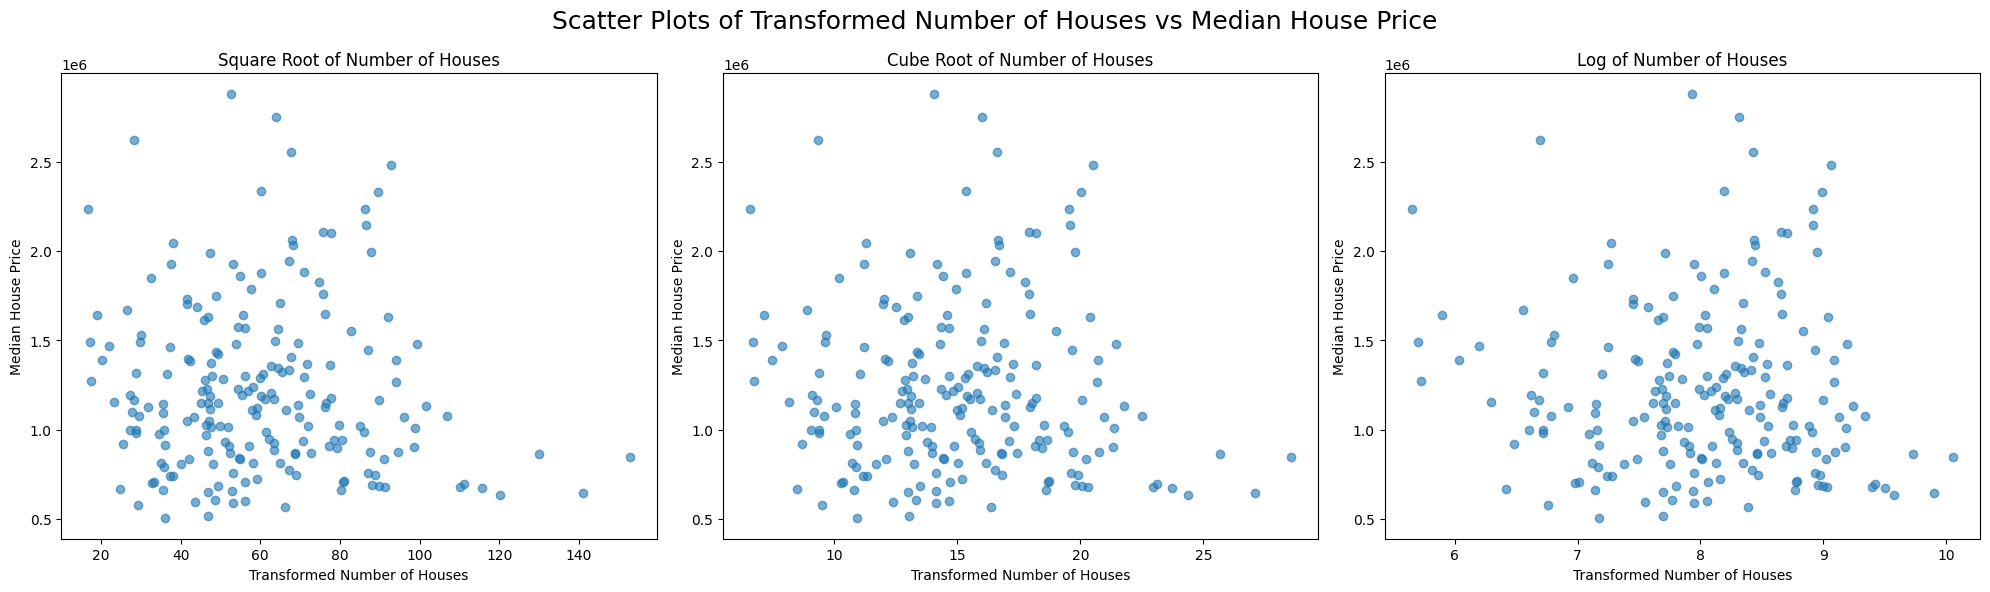

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply transformations for right-skewed data on 'number_of_houses'
suburb_df['sqrt_number_of_houses'] = np.sqrt(suburb_df['number_of_houses'])
suburb_df['cbrt_number_of_houses'] = np.cbrt(suburb_df['number_of_houses'])
suburb_df['log_number_of_houses'] = np.log1p(suburb_df['number_of_houses'])

# Plot histograms for the transformed features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Histograms and Scatter Plots for Transformations of Number of Houses', fontsize=18)

# Original Distribution
sns.histplot(suburb_df['number_of_houses'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Original Distribution of Number of Houses')

# Square Root Transformation
sns.histplot(suburb_df['sqrt_number_of_houses'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Square Root Transformation')

# Cube Root Transformation
sns.histplot(suburb_df['cbrt_number_of_houses'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Cube Root Transformation')

# Log Transformation
sns.histplot(suburb_df['log_number_of_houses'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Log Transformation')

plt.tight_layout()
plt.show()

# Plot scatter plots against median_house_price
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Scatter Plots of Transformed Number of Houses vs Median House Price', fontsize=18)

# Scatter plots
axes[0].scatter(suburb_df['sqrt_number_of_houses'], suburb_df['median_house_price'], alpha=0.6)
axes[0].set_title('Square Root of Number of Houses')

axes[1].scatter(suburb_df['cbrt_number_of_houses'], suburb_df['median_house_price'], alpha=0.6)
axes[1].set_title('Cube Root of Number of Houses')

axes[2].scatter(suburb_df['log_number_of_houses'], suburb_df['median_house_price'], alpha=0.6)
axes[2].set_title('Log of Number of Houses')

for ax in axes:
    ax.set_xlabel('Transformed Number of Houses')
    ax.set_ylabel('Median House Price')

plt.tight_layout()
plt.show()


* Observation:
- Square Root Transformation: This transformation reduces the skewness but still retains a slight skew. It is less spread out than the original distribution but does not achieve normality.
- Cube Root Transformation: The cube root transformation offers a more normalized spread of the data. It is less skewed compared to the square root transformation and shows a more balanced distribution.
- Log Transformation: The log transformation appears to compress the values more effectively, significantly reducing the skewness. It achieves the most normalized distribution among the transformations.

  **Since cube root transformation is working well we will use it for further analysis**

### 5.3 Transformation for number_of_units

#### 5.3.1 Initial Observations. 

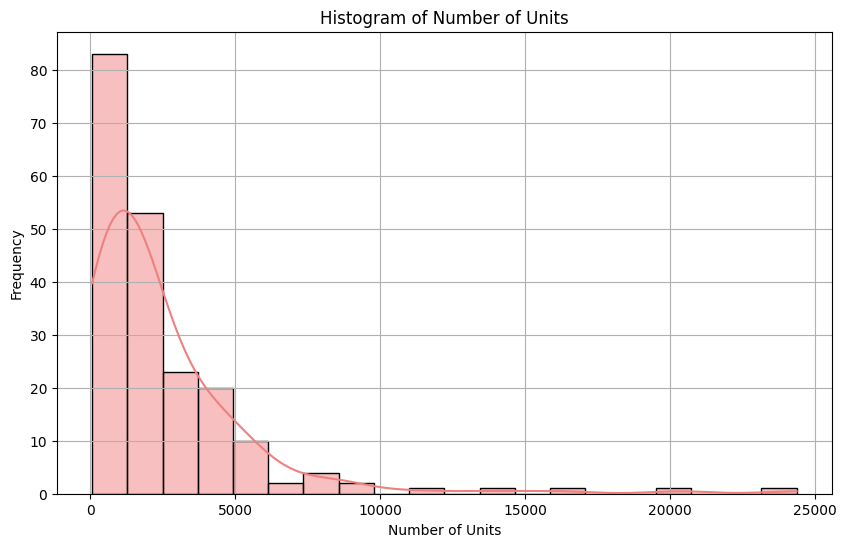

In [40]:
# Plotting the histogram for the 'number_of_units' column to understand its distribution
plt.figure(figsize=(10, 6))
sns.histplot(suburb_df['number_of_units'], bins=20, kde=True, color='lightcoral')
plt.title('Histogram of Number of Units')
plt.xlabel('Number of Units')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram for number_of_units indicates a right-skewed distribution. To make it more normally distributed, we are implementing the following transformations:

- Log Transformation (log1p): This can help reduce skewness by compressing larger values, making the distribution more symmetric.
- Square Root Transformation: Useful for reducing right skewness, though it's less aggressive than log transformation.
- Cube Root Transformation: Effective for right-skewed data, providing a balance between the square root and log transformations.
- Box-Cox Transformation: This is more flexible and can handle varying degrees of skewness but requires positive values. It automatically finds the optimal power transformation to make the distribution more normal.

#### 5.3.2 Applying Transformation.

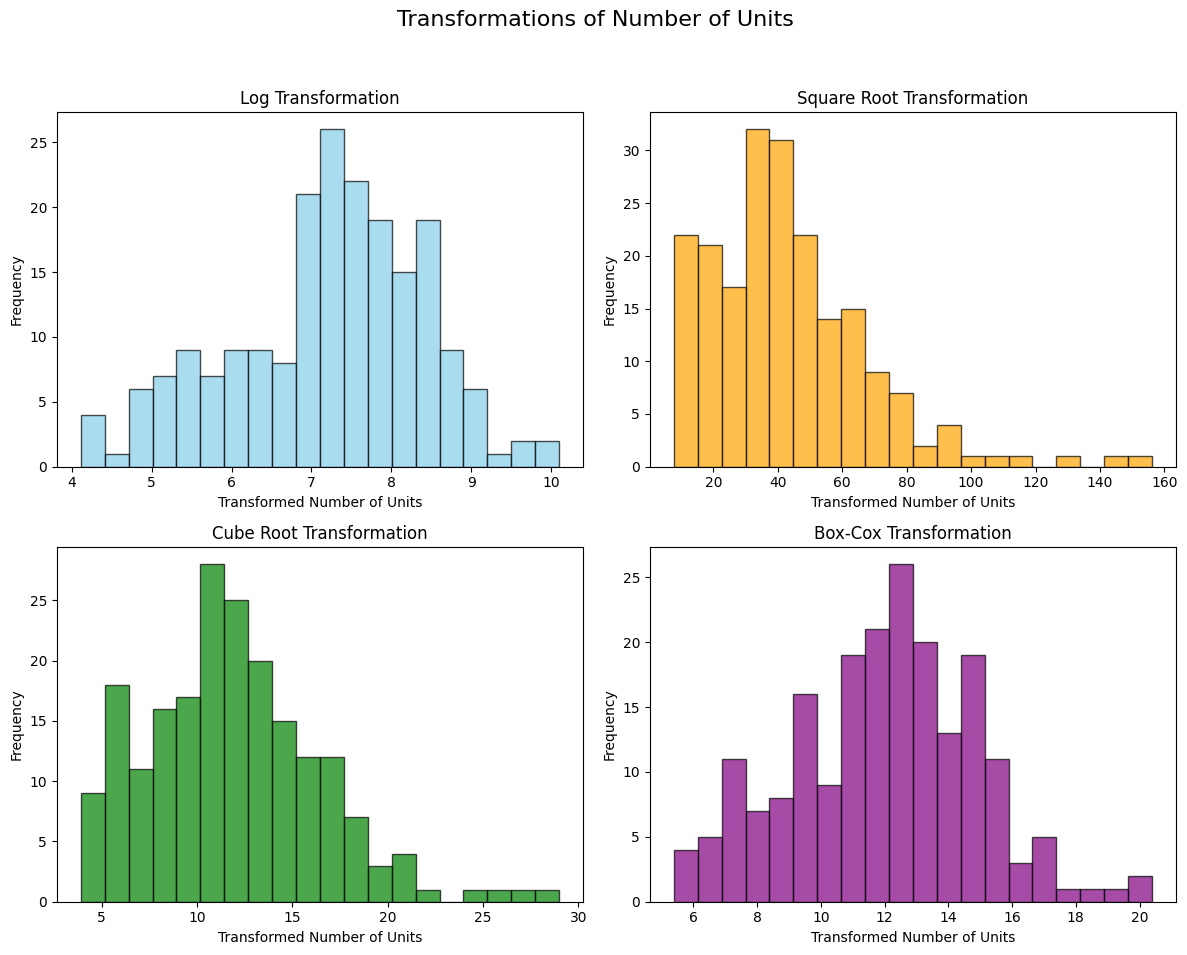

{'log': 0.31588338106435704,
 'sqrt': 0.35521601290283267,
 'cbrt': 0.34814798072030173,
 'boxcox': 0.33069883492394225}

In [41]:
import scipy.stats as stats

# Apply transformations
suburb_df['log_number_of_units'] = np.log1p(suburb_df['number_of_units'])
suburb_df['sqrt_number_of_units'] = np.sqrt(suburb_df['number_of_units'])
suburb_df['cbrt_number_of_units'] = np.cbrt(suburb_df['number_of_units'])

# Box-Cox transformation (only works with positive values)
suburb_df['boxcox_number_of_units'], _ = stats.boxcox(suburb_df['number_of_units'] + 1)  # Adding 1 to ensure positivity

# Plot histograms for each transformation
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Transformations of Number of Units', fontsize=16)

# Log Transformation
axs[0, 0].hist(suburb_df['log_number_of_units'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axs[0, 0].set_title('Log Transformation')

# Square Root Transformation
axs[0, 1].hist(suburb_df['sqrt_number_of_units'], bins=20, color='orange', edgecolor='black', alpha=0.7)
axs[0, 1].set_title('Square Root Transformation')

# Cube Root Transformation
axs[1, 0].hist(suburb_df['cbrt_number_of_units'], bins=20, color='green', edgecolor='black', alpha=0.7)
axs[1, 0].set_title('Cube Root Transformation')

# Box-Cox Transformation
axs[1, 1].hist(suburb_df['boxcox_number_of_units'], bins=20, color='purple', edgecolor='black', alpha=0.7)
axs[1, 1].set_title('Box-Cox Transformation')

for ax in axs.flat:
    ax.set_xlabel('Transformed Number of Units')
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Check correlations with the target variable (median_house_price)
correlations = {
    'log': suburb_df['log_number_of_units'].corr(suburb_df['median_house_price']),
    'sqrt': suburb_df['sqrt_number_of_units'].corr(suburb_df['median_house_price']),
    'cbrt': suburb_df['cbrt_number_of_units'].corr(suburb_df['median_house_price']),
    'boxcox': suburb_df['boxcox_number_of_units'].corr(suburb_df['median_house_price'])
}

correlations

In [42]:
suburb_df['number_of_units'].corr(suburb_df['median_house_price'])

0.3438576832340946

Considering the target variable it will be better if we go with highest correlation which we are getting using sqrt tranformation

### 5.4 Transformation on Population

#### 5.4.1 Initial Observation

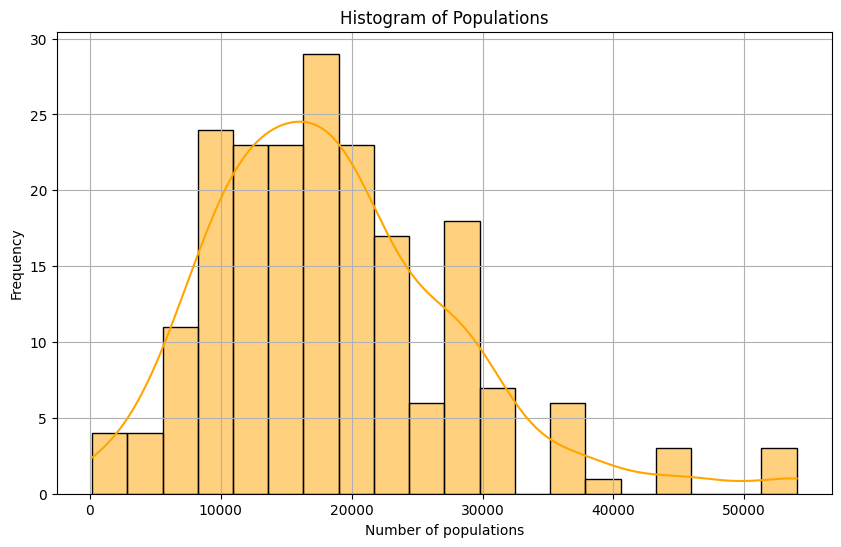

In [43]:
# Plotting the histogram for the 'popultion' column to understand its distribution
plt.figure(figsize=(10, 6))
sns.histplot(suburb_df['population'], bins=20, kde=True, color='orange')
plt.title('Histogram of Populations')
plt.xlabel('Number of populations')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### 5.4.2 Check for pearson correlation with the target variable

In [44]:
suburb_df['population'].corr(suburb_df['median_house_price'])

-0.2872423018397895

In [45]:
np.log1p(suburb_df['population']).corr(suburb_df['median_house_price'])

-0.1566377050756603

In [46]:
((suburb_df['population']) * (np.log(suburb_df['aus_born_perc_prop'] / (1 - suburb_df['aus_born_perc_prop'])))).corr(suburb_df['median_house_price'])

0.08923745597790242

#### 5.4.3 Applying Transformation

In [47]:
# Box-Cox transformation (only works with positive values)
suburb_df['boxcox_population'], _ = stats.boxcox(suburb_df['population'] + 1)  # Adding 1 to ensure positivity

In [48]:
suburb_df['boxcox_population'].corr(suburb_df['median_house_price'])

-0.2555341461303117

In [49]:
(np.cbrt(suburb_df['number_of_units'])/ suburb_df['population']).corr(suburb_df['median_house_price'])

0.018868476530829306

In [50]:
(np.log1p(suburb_df['population'])* (np.log(suburb_df['aus_born_perc_prop'] / (1 - suburb_df['aus_born_perc_prop'])))).corr(suburb_df['median_house_price'])

0.27631268808415915

In [51]:
np.log1p(suburb_df['population']).corr(np.cbrt(suburb_df['median_house_price']))

-0.15493185025085413

In [52]:
# Box-Cox transformation (only works with positive values)
suburb_df['boxcox_median_income'], _ = stats.boxcox(suburb_df['median_income'] + 1)  # Adding 1 to ensure positivity

In [53]:
(suburb_df['boxcox_median_income']).corr(suburb_df['median_house_price'])

0.7115584173719172

In [54]:
np.cbrt((suburb_df['population'])/((suburb_df['number_of_houses'])+(suburb_df['number_of_units']))).corr(suburb_df['median_house_price'])

-0.21318466315697698

In [55]:
np.sqrt(suburb_df['number_of_units'] * suburb_df['aus_born_perc']).corr(suburb_df['median_house_price'])

0.40406712036700393

## 6. Implementing Model by Applying Box-Cox Transformation for all the features.  

#### 6.1 Linear Regression Model with Box-Cox transformed feature. 

* Reason for Box-Cox Transformation:
Box-Cox transformation is used to make the data more normally distributed.
It helps to reduce skewness and stabilize variance, which is beneficial for linear models like Linear Regression.
Since the features showed better transformations with Box-Cox (as seen in prior tests), it is applied to all features.
* Why Apply MinMax Scaling:
After Box-Cox transformation, MinMax scaling is applied to bring all the features to the same scale.
Ensures that no feature dominates the model due to differences in magnitude.
Helps optimize convergence and prevents scale-based bias in linear models.
* Steps in the Process:
Features (number_of_houses, number_of_units, population, aus_born_perc, median_income) are selected.
Box-Cox transformation is applied to all features to normalize them.
MinMaxScaler is used to scale the transformed features between 0 and 1.
The data is then split into train and test sets.
A Linear Regression model is trained and tested on this transformed and scaled data.

In [56]:

# Select features and target variable
X = suburb_df[['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income']]
y = suburb_df['median_house_price']

# Apply Box-Cox transformation
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
X_boxcox = boxcox_transformer.fit_transform(X + 1e-5)  # Add small constant to handle zero values

# Apply MinMax scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_boxcox)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

r2_train, r2_test

(0.7084216937536718, 0.095480290860675)

In [57]:
np.log1p(suburb_df['aus_born_perc_prop']).corr(suburb_df['median_house_price'])

0.3092882353056806

* Outcome:
The model shows a good fit on the training data with an R² of 0.71.
However, the performance on the test set is low (R² of 0.095), indicating potential overfitting or the need for further feature engineering.

## 7. Linear Regression Model with respective transformations.

* Feature Selection:
Selected features include number_of_houses, number_of_units, aus_born_perc, population, and median_income.
The target variable is median_house_price.
* Transformation Functions:
Right-skewed transformations (square_root_transform, cube_root_transform, log_transform) are applied to variables that have a long right tail distribution.
Left-skewed transformations (left_skew_sqrt_transform, left_skew_cube_root_transform, left_skew_log_transform) are applied to variables that have a long left tail distribution.
[Ref: https://rcompanion.org/handbook/I_12.html#:~:text=For%20left%2Dskewed%20data%E2%80%94tail,log%20(constant%20%E2%80%93%20x).]
* Transformation Combinations:
Different combinations of the transformations are applied to the feature columns.
Each feature gets either no transformation or one of the available right or left skew transformations.
* Data Split:
The dataset is split into training (80%) and testing (20%) sets for model evaluation.
* MinMax Scaling:
After applying transformations, MinMaxScaler is used to bring all feature values into a consistent scale (between 0 and 1) to prevent features with larger values from dominating the regression model.
* Model Training:
A Linear Regression model is trained for each transformation combination.
The model’s performance is measured using R² on both the training and testing data.
The top 5 combinations with the highest R² on the test data are recorded.

In [58]:
# Define feature columns
features = ['number_of_houses', 'number_of_units', 'aus_born_perc', 'population', 'median_income']
target = 'median_house_price'

# Prepare transformation functions
def square_root_transform(x):
    return np.sqrt(x)

def cube_root_transform(x):
    return np.cbrt(x)

def log_transform(x):
    return np.log1p(x)

def left_skew_sqrt_transform(x):
    return np.sqrt(max(suburb_df['aus_born_perc']) - x)

def left_skew_cube_root_transform(x):
    return np.cbrt(max(suburb_df['aus_born_perc']) - x)

def left_skew_log_transform(x):
    return np.log1p(max(suburb_df['aus_born_perc']) - x)

# Define transformations for right-skewed and left-skewed features
right_skew_transformations = [square_root_transform, cube_root_transform, log_transform]
left_skew_transformations = [left_skew_sqrt_transform, left_skew_cube_root_transform, left_skew_log_transform]

# Prepare combinations of transformations for each feature
transformation_combinations = list(product(
    right_skew_transformations,  # number_of_houses
    right_skew_transformations,  # number_of_units
    left_skew_transformations,   # aus_born_perc
    right_skew_transformations,  # population
    [None]                       # median_income (no transformation)
))

# Split data into training and testing sets
X = suburb_df[features]
y = suburb_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to keep track of models and R² scores
models_r2_scores = []

# Iterate through transformation combinations
for idx, (house_tf, unit_tf, aus_tf, pop_tf, income_tf) in enumerate(transformation_combinations):
    # Apply transformations on training and test sets
    X_train_transformed = pd.DataFrame({
        'number_of_houses': house_tf(X_train['number_of_houses']),
        'number_of_units': unit_tf(X_train['number_of_units']),
        'aus_born_perc': aus_tf(X_train['aus_born_perc']),
        'population': pop_tf(X_train['population']),
        'median_income': X_train['median_income']  # No transformation
    })
    
    X_test_transformed = pd.DataFrame({
        'number_of_houses': house_tf(X_test['number_of_houses']),
        'number_of_units': unit_tf(X_test['number_of_units']),
        'aus_born_perc': aus_tf(X_test['aus_born_perc']),
        'population': pop_tf(X_test['population']),
        'median_income': X_test['median_income']  # No transformation
    })
    
    # Apply MinMax scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_transformed)
    X_test_scaled = scaler.transform(X_test_transformed)
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Calculate R² for training and test sets
    train_r2 = r2_score(y_train, model.predict(X_train_scaled))
    test_r2 = r2_score(y_test, model.predict(X_test_scaled))
    
    # Store results
    models_r2_scores.append({
        'combination': idx,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'house_tf': house_tf.__name__,
        'unit_tf': unit_tf.__name__,
        'aus_tf': aus_tf.__name__,
        'pop_tf': pop_tf.__name__
    })

# Convert results to DataFrame and sort by test R² in descending order
results_df = pd.DataFrame(models_r2_scores)
top_5_models = results_df.sort_values(by='test_r2', ascending=False).head(5)

# Display the top 5 models
print("Top 5 Models with R² on Test Data:")
print(top_5_models)

Top 5 Models with R² on Test Data:
    combination  train_r2   test_r2               house_tf  \
42           42  0.716089  0.182083    cube_root_transform   
33           33  0.705714  0.179765    cube_root_transform   
6             6  0.709149  0.179056  square_root_transform   
15           15  0.719506  0.174596  square_root_transform   
39           39  0.714972  0.172453    cube_root_transform   

                  unit_tf                         aus_tf  \
42    cube_root_transform        left_skew_log_transform   
33  square_root_transform        left_skew_log_transform   
6   square_root_transform        left_skew_log_transform   
15    cube_root_transform        left_skew_log_transform   
39    cube_root_transform  left_skew_cube_root_transform   

                   pop_tf  
42  square_root_transform  
33  square_root_transform  
6   square_root_transform  
15  square_root_transform  
39  square_root_transform  


Here all of these combinations are not working that well. Since the test r2 is relatively very low.

## 8. Final transformations and scaling

In [59]:
# Convert 'aus_born_perc' to proportion (0-1) and apply logit transformation
suburb_df['aus_born_perc_prop'] = suburb_df['aus_born_perc'] / 100
suburb_df['logit_aus_born_perc'] = np.log(suburb_df['aus_born_perc_prop'] / (1 - suburb_df['aus_born_perc_prop']))

suburb_df['log_population'] = np.log1p(suburb_df['population'])
# Add the selected feature to the feature set
suburb_df['log_pop_aus_born'] = suburb_df['log_population'] * suburb_df['aus_born_perc']

suburb_df['unit_aus'] = np.sqrt(suburb_df['number_of_units']) * suburb_df['aus_born_perc']

suburb_df['cbrt_number_of_houses'] = np.cbrt(suburb_df['number_of_houses']) 

# Define features for the linear regression model
features = ['logit_aus_born_perc', 'median_income', 'log_population', 'cbrt_number_of_houses', 'unit_aus']
X = suburb_df[features]
y = suburb_df['median_house_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and calculate R^2 for both train and test sets
train_predictions = lr_model.predict(X_train)
test_predictions = lr_model.predict(X_test)

r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

r2_train, r2_test


(0.7116002563046575, 0.48788817883640534)

**Apply different scaling techniques**

In [60]:
# Initialize different scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

# Dictionary to store R^2 results
r2_results = {}


In [61]:
# Iterate over different scalers, fit/transform on train, transform on test, and evaluate R^2 scores
for scaler_name, scaler in scalers.items():
    # Fit and transform on the training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Transform on the test data
    X_test_scaled = scaler.transform(X_test)
    
    # Train the Linear Regression model using scaled data
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    
    # Predict and calculate R^2 for both train and test sets using scaled data
    train_predictions_scaled = lr_model.predict(X_train_scaled)
    test_predictions_scaled = lr_model.predict(X_test_scaled)
    
    # Calculate R^2
    r2_train_scaled = r2_score(y_train, train_predictions_scaled)
    r2_test_scaled = r2_score(y_test, test_predictions_scaled)
    
    # Store the R^2 for test set
    r2_results[scaler_name] = (r2_train_scaled, r2_test_scaled)

# Find the best scaler based on R^2 on the test set
best_scaler = max(r2_results, key=lambda k: r2_results[k][1])
best_scaler, r2_results


('MinMaxScaler',
 {'MinMaxScaler': (0.7116002563046575, 0.48788817883640445),
  'StandardScaler': (0.7116002563046574, 0.48788817883640434),
  'RobustScaler': (0.7116002563046574, 0.4878881788364041),
  'MaxAbsScaler': (0.7116002563046575, 0.48788817883640423)})

##### So here we are getting same r2 values for all the scalers

- Considering the above best features which follows the assumptions of the linear regression model.<br>
      - No inter multi-collinearity between independent variables<br>
      - Almost correlated with the target variable<br>
      - And almost have the gaussian distribution<br>
[Ref: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/]

#### Heatmap for checking feature collinearity

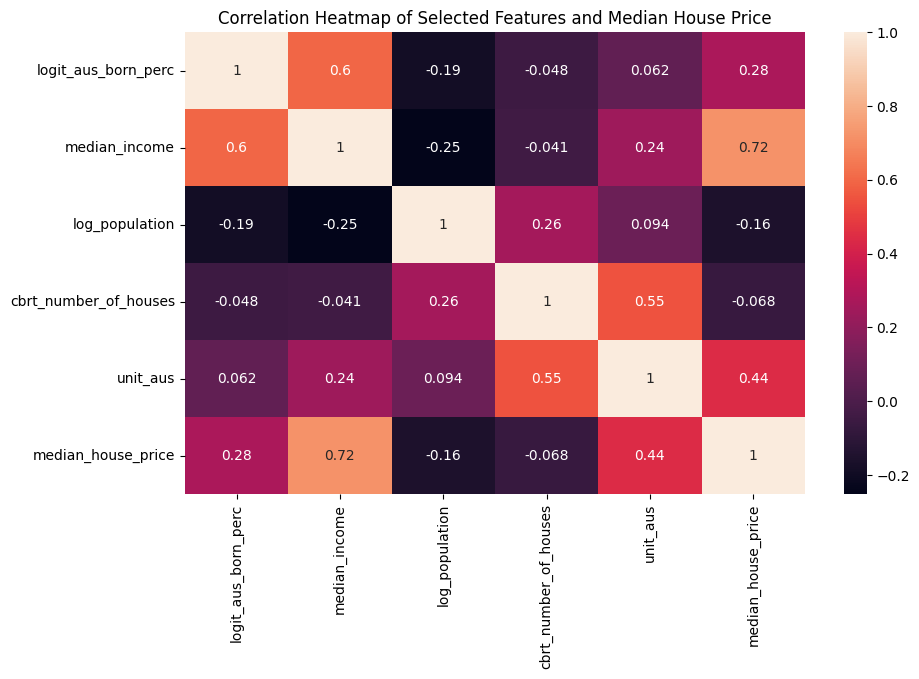

In [62]:
# Calculate the correlation matrix of the selected features and target
corr_matrix = suburb_df[features + ['median_house_price']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap of Selected Features and Median House Price")
plt.show()

Since we don't have pearson correlation above 0.8 between the feature which suggests they are not collinear between themselves.

#### Scatter plots showing the linear correlation between the independent variables and the target variable.

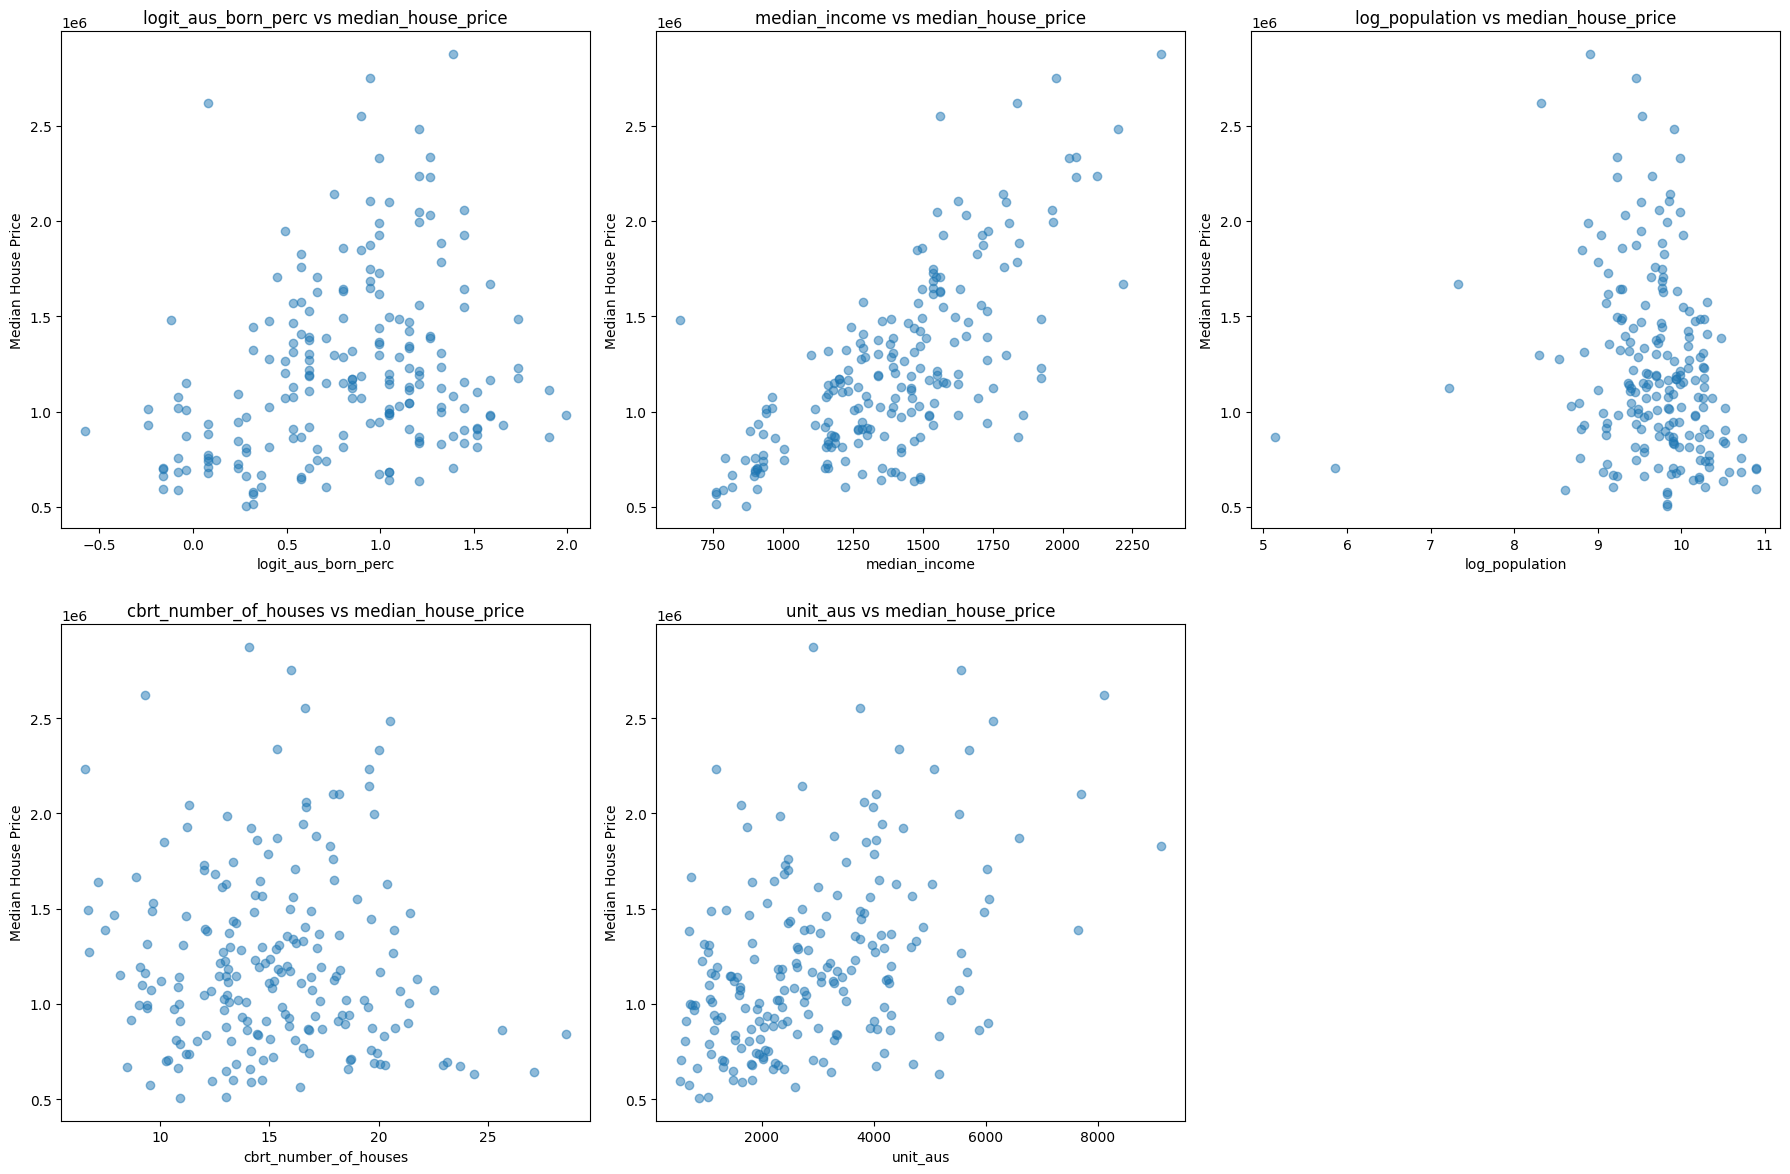

In [63]:
target = 'median_house_price'

# Initialize subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Generate scatter plots
for idx, feature in enumerate(features):
    ax = axes[idx]
    ax.scatter(suburb_df[feature], suburb_df[target], alpha=0.5)
    ax.set_title(f"{feature} vs {target}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Median House Price")

# Remove the last empty subplot (6th position)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


## References:
- https://www.almabetter.com/bytes/articles/3-best-ways-to-handle-right-skewed-data
- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/
- https://rcompanion.org/handbook/I_12.html#:~:text=For%20left%2Dskewed%20data%E2%80%94tail,log%20(constant%20%E2%80%93%20x).